In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
iris = pd.read_csv('data/iris.data', header = None)

In [4]:
type(iris)

pandas.core.frame.DataFrame

In [5]:
iris[:5] #슬라이스로 처음 5개 행 확인 ->  자료형은  dataframe

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Dataframe을 ndarray로 처리해서 실용적으로 처리한다

In [6]:
iris.values[:5] # ->  자료형은  ndarray

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']], dtype=object)

In [7]:
X = iris.values[:, :4].astype('float32') # feature만 추출, 만일 데이터 중 숫자가 아닌 문자가 있었다면 오류날 것

In [13]:
iris.values.astype('float32') # 참고

ValueError: could not convert string to float: 'Iris-virginica'

In [8]:
y = iris.values[:,4]

In [11]:
X.shape, X.dtype

((150, 4), dtype('float32'))

In [12]:
y.shape, y.dtype # dtype이 'O'인 이유는 임의의 일반적인 객체라는 의미의 object이다 (원본의 dtype을 유지함)

((150,), dtype('O'))

(위의 경우) 문자 데이터인 경우에는 문자로 처리하지 않고 object로 남겨 두어도 됨

유형(class)

In [14]:
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

데이터 시각화

In [22]:
x1 = X[:,0]
x3 = X[:,2]

col = np.where(y == 'Iris-setosa', 0, y)
col = np.where(col == 'Iris-versicolor', 1, col)
col = np.where(y == 'Iris-virginica', 2, col)

In [23]:
np.unique(col)

array([0, 1, 2], dtype=object)

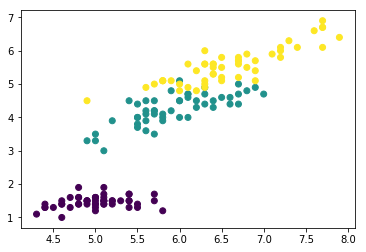

In [24]:
plt.scatter(x1, x3, c = col)

산점도 행렬

한번에 두 개씩 모든 특성의 조합을 산점도로 출력

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001284BF06908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001284C25BD30>]], dtype=object)

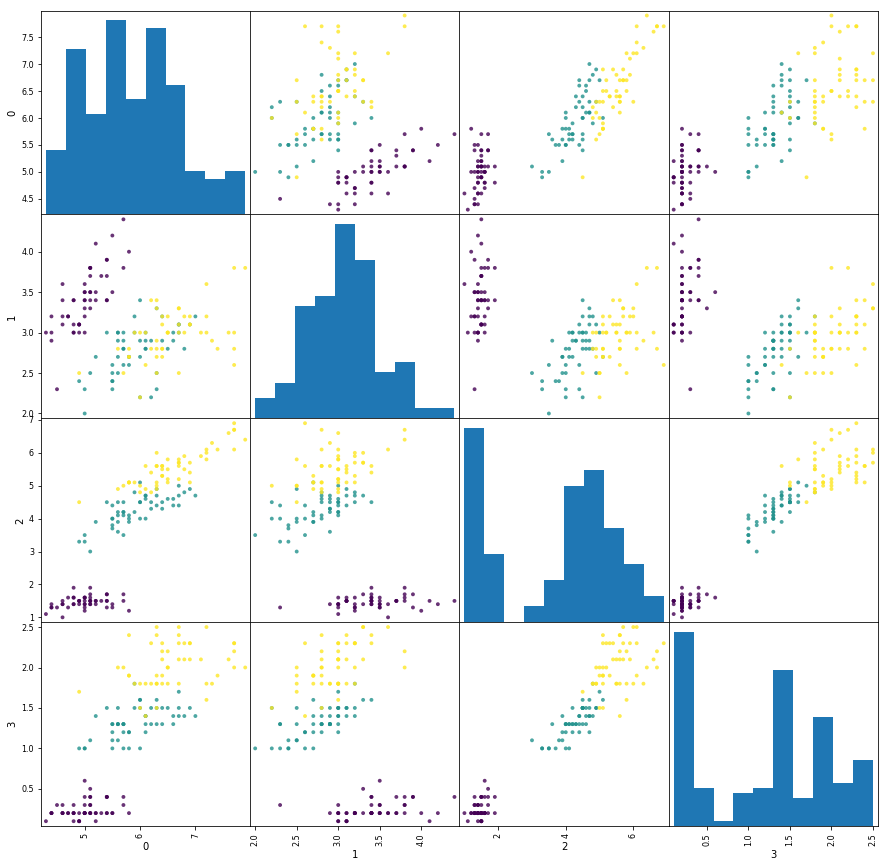

In [29]:
pd.plotting.scatter_matrix(iris, c = col, 
                           # hist_kwds = {'bins': 20}, # 막대의 갯수
                           figsize = (15,15) , s = 60, alpha = 0.8)

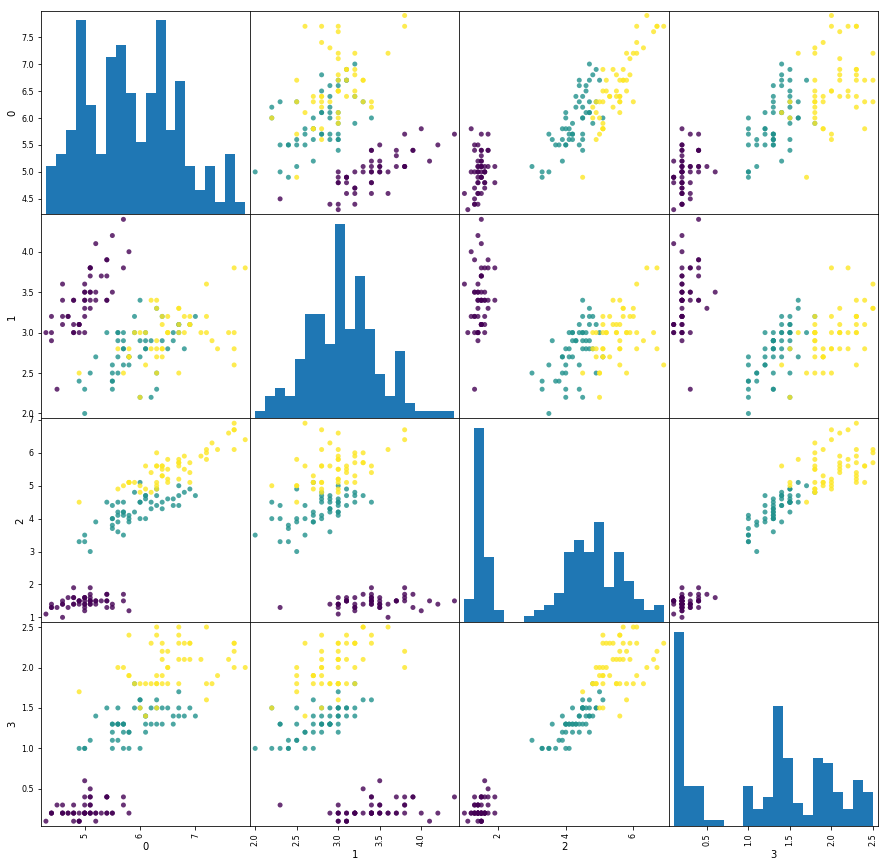

In [30]:
_ = pd.plotting.scatter_matrix(iris, c = col, 
                           hist_kwds = {'bins': 20}, 
                           figsize = (15,15) , s = 100, alpha = 0.8) # S 점의 크기, alpha = 투명도

위 그래프로 데이터의 분포와 복잡성, 다른 데이터와의 분리 등을 알 수 있다.
보라색은 잘 분류되지만(알고리즘으로 잘 분류될 듯...), 노란색과 초록색의 구분은 어려우므로 알고리즘으로 하기 어려울 듯...
차원이 많아지면 산점도 행렬로 그릴 수도 없다

기계학습 모델 선택

In [31]:
from sklearn.neighbors import KNeighborsClassifier # 분류기 (현재 y는 분류의 문제이므로)

모델 설정

In [32]:
model = KNeighborsClassifier() # 기본 설정을 사용한 것이고, 아래에서 기본값이 무엇인지 알 수 있다

모델 훈련 (지도학습)

In [33]:
model.fit(X,y) # 모델의 훈련 = fit , 지도학습인 이유는 label (y)를 제공해주기 때문...

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

"예측" : 모델 활용

In [34]:
Xnew = np.array([[5.0, 2.9, 1.0, 0.2]]) # 새로운 붓꽃 데이터를 얻었다고 가정하고 (새로운 표본)

(주의) 모델이 샘플과 특징으로 구성된 2차원 데이터로 훈련을 했으므로 새로운 샘플도 같은 포맷을 가져야 한다

In [35]:
Xnew.shape # (샘플, 특징)

(1, 4)

In [36]:
model.predict(Xnew)

array(['Iris-setosa'], dtype=object)

모델을 평가

모델의 성능은 여러 개의 표본으로 측정할 필요가 있음

In [37]:
y_pred = model.predict(X) # 150개로 다시 예측을 하는 것

In [38]:
y_pred[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [39]:
accu = np.mean(y==y_pred)  # 정확도
accu

0.96666666666666667

In [40]:
y[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [41]:
y_pred[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

위 방법은 과적합의 문제가 있음

그러므로 주어진 데이터를 활용하는 방법을 찾는다 -> 훈련/시험 데이터로 구분

In [42]:
from sklearn.model_selection import train_test_split # 훈련, 시험 데이터의 분리

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle = True, test_size = 0.25, random_state = 0) 
  # 원본 X는 건드리지 않고, train, test(25%)로 구분한다 <- 이 설정이 기본 설정이다
  # shuffle이 중요 -> 훈련에서 보지 못한 데이터로 테스트를 해야하는 상황을 예방하는 것
  # 즉 shuffle 이후 split을 한다
  # X와 y를 통시에 shuffle하고 split해야 X와 y데이터가 엉뚱하게 shuffle되지 않는다
  # random_state = 0는 교육 목적으로 쓰는 것이므로 실제에서는 쓰지 않는다

In [93]:
X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape
  # 특징은 그대로 4개로 남아있는 것이 맞다, 샘플만 나뉘는 것

((150, 4), (112, 4), (38, 4), (150,), (112,), (38,))

In [94]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [95]:
y_test_pred = model.predict(X_test)

In [96]:
y_test_pred[:5]

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [97]:
accu = np.mean(y_test==y_test_pred)  # 정확도 (샘플의 숫자가 증가하면 정확도의 분산이 줄어들 수 있다)
accu

0.97368421052631582

(훈련에 참여하지 않은) 새로운 데이터에 대해서 정확도를 보는 것이 필요 --> 일반화 성능

성능을 모니터링

In [98]:
def f():
    for _ in range(100000):
        pass

In [99]:
%prun #성능분석 (호출횟수, 총시간, , 누적시간, ...)

f() 
# 연산 --> IO bound, CPU bound (알고리즘이 복잡한 경우)

In [100]:
np.__file__ # double underscore -> dunder 라고 부른다. 특수 속성을 의미한다 (import되는 파일의 위치)

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\numpy\\__init__.py'

In [102]:
ya = pd.Series(y_test)
ya.name = 'y'
yh = pd.Series(y_test_pred)
yh.name = 'y_pred'
feat = iris.iloc[:, 0:4]
pd.concat([feat, ya, yh], axis = 1)

,0,1,2,3,y,y_pred
0,5.1,3.5,1.4,0.2,Iris-virginica,Iris-virginica
1,4.9,3.0,1.4,0.2,Iris-versicolor,Iris-versicolor
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-virginica,Iris-virginica
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-virginica,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-versicolor,Iris-versicolor
8,4.4,2.9,1.4,0.2,Iris-versicolor,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-versicolor,Iris-versicolor


In [103]:
def f_pred(feat, y, y_pred):
    ya = pd.Series(y_test) # 1차원 벡터형태의 자료를 표현할 때 사용
    ya.name = 'y'
    yh = pd.Series(y_test_pred)
    yh.name = 'y_pred'
    
    return pd.concat([feat, ya, yh], axis = 1)

feat = iris.iloc[:, 0:4]
f_pred(feat, y, y_pred)

,0,1,2,3,y,y_pred
0,5.1,3.5,1.4,0.2,Iris-virginica,Iris-virginica
1,4.9,3.0,1.4,0.2,Iris-versicolor,Iris-versicolor
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-virginica,Iris-virginica
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-virginica,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-versicolor,Iris-versicolor
8,4.4,2.9,1.4,0.2,Iris-versicolor,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-versicolor,Iris-versicolor


In [107]:
def f_pred(feat, y, y_pred):
    ya = pd.Series(y_test) # 1차원 벡터형태의 자료를 표현할 때 사용
    ya.name = 'y'
    yh = pd.Series(y_test_pred)
    yh.name = 'y_pred'
    
    return pd.concat([feat, ya, yh], axis = 1)

feat = iris.iloc[:, 0:4]
result_table = f_pred(feat, y, y_pred)

In [108]:
result_table.to_excel('result_table.xlsx')

In [109]:
iris[:10]

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# (p53) ch2 지도학습

회귀 출력 예시 데이터 셋

In [110]:
boston = pd.read_csv('data/boston.csv') # boston지역의 부동산 데이터

In [111]:
boston[:5]

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


부동산 데이터에서 지역을 뽑는 방법?

1) 목표의 선택  -> y = Price

#### 연습

주어진 데이터셋을 지도학습용으로 준비한다

살펴볼 점

1. 샘플과 특징은 각각 몇 개씩인가?  -> 506개, 13차원 -> 차원이 크므로 시각화가 의미가 없다
2. y 값의 범위는?

지도학습으로 데이터셋 가공

In [127]:
X = boston.values[:,1:].astype('float32')
y = boston.values[:,0].astype('float32')

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

탐색적 데이터 분석

In [128]:
X.shape, y.shape

((506, 13), (506,))

In [129]:
y.min(), y.max(), y.mean()  # 분류에서는 np.unique(y)를 썼지만, 회귀에는 의미가 없다

(5.0, 50.0, 22.532806)

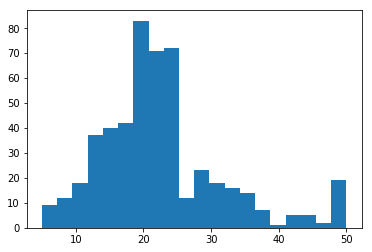

In [131]:
_ = plt.hist(y, bins= 20) # _ (밑줄 변수는 버리는 값을 의미한다. 보기싫은 정보를 제거하는 효과가 있다)

기계학습 모델을 선택한다 (지금 데이터는 회귀에 적합하다)

In [133]:
from sklearn.neighbors import KNeighborsRegressor

In [134]:
model = KNeighborsRegressor(n_neighbors=1) # (파리미터) 이웃의 숫자 

In [135]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [136]:
y_train_pred = model.predict(X_train)  # 훈련한 것으로 y_train_pred가 100으로 다시 예측하는가를 본 것
y_test_pred = model.predict(X_test) # 테스트 데이터로 평가를 한 것

In [137]:
y_test_pred[:5]  

array([ 20.70000076,  50.        ,  19.        ,  20.60000038,  22.        ], dtype=float32)

회귀인 경우에는 평가지표가 달라야 한다 y==t_pred (이런 문제가 있다 ... --> 22.6 <> 22.7)

회귀용 평가지표

In [138]:
from sklearn.metrics import r2_score

In [139]:
train_score = r2_score(y_train, y_train_pred)  # 순서는 label이 앞에, 예측값이 뒤에 온다
test_score = r2_score(y_test, y_test_pred)
train_score, test_score

(1.0, 0.57666002208213341)

test_score를 보면 0.57이어서 다른 방법을 고려해야할 것이다

In [140]:
r2_score? # '?'는 jupyter에서는 자기 관찰이라고 부른다

두번째 scikit-learn 웹사이트에서 도움말을 보는 법 --> https://scikit-learn.org 웹사이트를 활용

분류 데이터셋 예시 : 종양 데이터셋 (붓꽃 데이터셋은 간단해서 다른 데이터셋을 사용한다)

 : 데이터를 보고서 암인지 아닌지 분류하는 것

In [142]:
cancer = pd.read_csv('data/cancer.csv')

In [143]:
cancer[:5]

,type,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(데이터 설명) type (종양 : 악성malignant/양성benign)

탐색적 데이터분석

In [148]:
tumor = cancer.values[:,0]

In [149]:
np.unique(tumor)

array(['benign', 'malignant'], dtype=object)

In [150]:
cancer.shape  # cancer는 DataFrame 하지만 ndarray의 shape를 DataFrame에서도 쓸 수 있다
  # 특징의 갯수는 31로 보이지만, y값을 빼어야 하므로 30개가 된다

(569, 31)

지도학습용 준비

In [151]:
y = cancer.values[:, 0]
X = cancer.values[:, 1:].astype('float32')

In [152]:
X.shape, y.shape

((569, 30), (569,))

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

분류기를 사용

In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [157]:
model = KNeighborsClassifier() # 기본설정을 사용 (모델의 개체출력을 하면 알 수 있다)

In [156]:
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

훈련과 시험을 반복하면서 설정의 적절함을 찾는 것이다.

In [158]:
model = model.fit(X_train, y_train)

In [159]:
train_score = model.score(X_train, y_train)  # 훈련과 시험을 같이 보는 이유는 과소적합, 과대적합을 판단하려고
test_score = model.score(X_test, y_test)

In [160]:
train_score, test_score

(0.94835680751173712, 0.95104895104895104)

결과가 
(0.94835680751173712, 0.95104895104895104) 이렇게 나왔으니, 괜찮은 편이다.

그런데... 파라미터에서 이웃의 숫자 5가 적절한가?

####  모델 설정에 따른 성능 평가

"이웃의 숫자에 따라서 점수가 어떻게 바뀔까?"

In [174]:
n_range = list(range(1,21))
n_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [175]:
result = {} # 여러개의 데이터를 저장하는 파이썬의 Dictionary 구조임 {색인:값, 색인:값, ...}
for n_nei in n_range:
    model = KNeighborsClassifier(n_neighbors=n_nei)
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    result[n_nei] = {'train' : train_score, 'test' : test_score}

In [176]:
table_train_result = pd.DataFrame(result).T  # .T 는 행과 열을 바꾸는 연산자 (Transpose)
table_train_result

,test,train
1,0.895105,1.000000
2,0.923077,0.946009
3,0.930070,0.953052
4,0.937063,0.943662
5,0.951049,0.948357
6,0.937063,0.943662
7,0.944056,0.943662
8,0.958042,0.941315
9,0.951049,0.938967
10,0.958042,0.938967


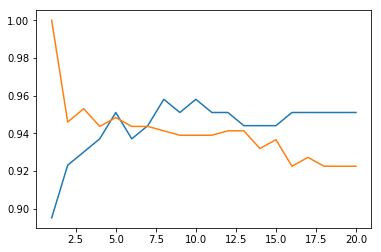

In [177]:
_ = plt.plot(table_train_result)

In [178]:
result

{1: {'test': 0.8951048951048951, 'train': 1.0},
 2: {'test': 0.92307692307692313, 'train': 0.9460093896713615},
 3: {'test': 0.93006993006993011, 'train': 0.95305164319248825},
 4: {'test': 0.93706293706293708, 'train': 0.94366197183098588},
 5: {'test': 0.95104895104895104, 'train': 0.94835680751173712},
 6: {'test': 0.93706293706293708, 'train': 0.94366197183098588},
 7: {'test': 0.94405594405594406, 'train': 0.94366197183098588},
 8: {'test': 0.95804195804195802, 'train': 0.94131455399061037},
 9: {'test': 0.95104895104895104, 'train': 0.93896713615023475},
 10: {'test': 0.95804195804195802, 'train': 0.93896713615023475},
 11: {'test': 0.95104895104895104, 'train': 0.93896713615023475},
 12: {'test': 0.95104895104895104, 'train': 0.94131455399061037},
 13: {'test': 0.94405594405594406, 'train': 0.94131455399061037},
 14: {'test': 0.94405594405594406, 'train': 0.931924882629108},
 15: {'test': 0.94405594405594406, 'train': 0.93661971830985913},
 16: {'test': 0.95104895104895104, 'tra

In [179]:
result[1]

{'test': 0.8951048951048951, 'train': 1.0}

In [180]:
pd.DataFrame(result)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
test,0.895105,0.923077,0.930070,0.937063,0.951049,0.937063,0.944056,0.958042,0.951049,0.958042,0.951049,0.951049,0.944056,0.944056,0.944056,0.951049,0.951049,0.951049,0.951049,0.951049
train,1.000000,0.946009,0.953052,0.943662,0.948357,0.943662,0.943662,0.941315,0.938967,0.938967,0.938967,0.941315,0.941315,0.931925,0.936620,0.922535,0.927230,0.922535,0.922535,0.922535


#### (p337) 5.2 그리드 서치

그리드 서치 내용을 참조

 -> 최고의 조합을 내는 A와 B의 설정을 찾아내는 방법
 -> 모델 튜닝의 방법이 '그리드 서치' 이다
 
 -> 지금처럼 차원이 하나(이웃의 숫자)라 하더라도 이 방법은 그리드 서치의 방법이다

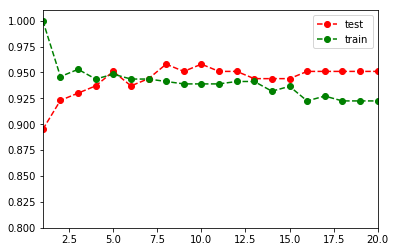

In [181]:
style = {'train' : 'go--', 'test':'ro--'}  # 색상(green), 마커(o), 선스타일(--)
table_train_result.plot(style=style, ylim=(0.8, 1.01))

1. 이웃의 숫자가 1일때 (왼쪽 끝) : 과적합이다 (일반화 능력이 떨어진다)
2. 이웃의 갯수가 늘어나면
  1) 훈련 점수는 낮아진다 (KNN은 이웃의 숫자가 1이면 훈련점수는 1.0에서 시작한다) -> 데이터를 외우고 있어서 자기자신의 거리 0으로 계산되므로
3. 선택하는 방법
  1) test와 train 데이터의 차이가 적고
  2) test의 결과가 더 높은 것을 찾는다

위는 cancer 데이터에 대해서 분석한 것이고,
아래는 부동산 데이터에 대해서 분석한다

#### 연습

주어진 데이터에 대해 kNN 모델의 최적 설정을 찾아본다

1. '최적' 점수에 만족하는가?

In [213]:
boston[:5]

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


지금 시도하는 것은 모델의 최적 조건을 그리드 탐색을 찾고자 하는 것

In [239]:
y = boston.values[:, 0].astype('float32') # 회귀
X = boston.values[:,1:].astype('float32')

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [241]:
boston_train_result = {} # 여러개의 데이터를 저장하는 파이썬의 Dictionary 구조임 {색인:값, 색인:값, ...}
for n_nei in range(1,21):
    model = KNeighborsRegressor(n_neighbors=n_nei).fit(X_train,y_train) # 모델을 생성하면서, 바로 fit
        
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    boston_train_result[n_nei] = {'train' : train_score, 'test' : test_score}

In [242]:
table_boston_train_result = pd.DataFrame(boston_train_result).T  # .T 는 행과 열을 바꾸는 연산자 (Transpose)
table_boston_train_result

,test,train
1,0.451910,1.000000
2,0.544129,0.832756
3,0.540488,0.750025
4,0.583683,0.707416
5,0.607713,0.690071
6,0.587118,0.656711
7,0.587664,0.618352
8,0.566084,0.600876
9,0.553876,0.564926
10,0.536937,0.557107


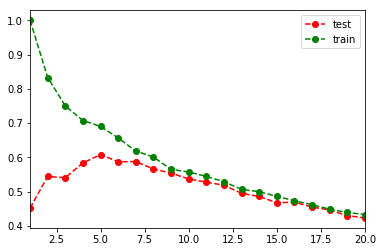

In [243]:
table_boston_train_result.plot(style = style)

위 표에서 ...

훈련점수의 희생이 있으면, 시험점수의 상승이 필요하다.

간격을 좁히는 것이 중요하다.

과적합을 줄일지(간격을 줄일지), 테스트의 정확성이 높은 것을 선택할지는 각 분석의 목적과 상황에 따라서 다르다

In [205]:
y[:10]

array([ 24.        ,  21.60000038,  34.70000076,  33.40000153,
        36.20000076,  28.70000076,  22.89999962,  27.10000038,
        16.5       ,  18.89999962], dtype=float32)

In [207]:
X[:10] # 데이터의 표기법만 다른 것임 (pandas 와 ndarray의 표기가 달라서이지, 정규화된 것은 아님)

array([[  6.32000016e-03,   1.80000000e+01,   2.30999994e+00,
          0.00000000e+00,   5.37999988e-01,   6.57499981e+00,
          6.51999969e+01,   4.09000015e+00,   1.00000000e+00,
          2.96000000e+02,   1.53000002e+01,   3.96899994e+02,
          4.98000002e+00],
       [  2.73100007e-02,   0.00000000e+00,   7.07000017e+00,
          0.00000000e+00,   4.69000012e-01,   6.42100000e+00,
          7.89000015e+01,   4.96710014e+00,   2.00000000e+00,
          2.42000000e+02,   1.77999992e+01,   3.96899994e+02,
          9.14000034e+00],
       [  2.72899996e-02,   0.00000000e+00,   7.07000017e+00,
          0.00000000e+00,   4.69000012e-01,   7.18499994e+00,
          6.10999985e+01,   4.96710014e+00,   2.00000000e+00,
          2.42000000e+02,   1.77999992e+01,   3.92829987e+02,
          4.03000021e+00],
       [  3.23700011e-02,   0.00000000e+00,   2.18000007e+00,
          0.00000000e+00,   4.58000004e-01,   6.99800014e+00,
          4.57999992e+01,   6.06220007e+00,   3.000

In [211]:
boston.values.shape

(506, 14)

In [212]:
boston.shape

(506, 14)

## (p171) kNN이 잘 쓰지 않는 모델이지만
1. 과소적합, 과대적합
2. 평가
의 개념을 익히기 위한 것이다

## (p73) 선형모델

## 1943 MCP 뉴런 (McCulloch-Pitts)

인공지능의 기원, 21세기 딥러닝에서도 여전히 기본 단위로 사용

In [247]:
x = np.array([0.1, 0.1, 0.1])

단계1 : 입력에는 가중치(weight)가 부여된다

In [248]:
w = np.array([0.1, 1.0, 0.0])

In [249]:
x * w

array([ 0.01,  0.1 ,  0.  ])

단계2 : 취합

In [250]:
z = np.sum(x * w)
z

0.11000000000000001

단계3 : 활성화

출력을 결정한다

In [251]:
b = 0.2 # 임계점

In [253]:
y = 1 if z > b else -1
y

-1

MCP 뉴런을 활용한 논리회로

In [254]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = 0.7
    # MCP 뉴런
    z = np.sum(x * w)
    y = 1 if z > b else -1
    return y

In [257]:
def test(logic):
    for x1, x2 in [(0,0), (0,1), (1,0), (1,1)]:
        y = logic(x1, x2)
        print(x1, x2, '|', y)

In [258]:
test(AND)

0 0 | -1
0 1 | -1
1 0 | -1
1 1 | 1


NAND를 구현한다

In [259]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) # 매개변수 w와 b의 변경만으로 AND, NAND를 만들 수 있다
    b = -0.7
    # MCP 뉴런
    z = np.sum(x * w)
    y = 1 if z > b else -1
    return y

In [260]:
test(NAND)

0 0 | 1
0 1 | 1
1 0 | 1
1 1 | -1


(결론) 매개변수 w,b만으로 학습의 출력이 달라질 수 있다.

인공지능 --> 데이터를 기반으로 매개변수를 알아내는 것